## Figure. ssGEMs simulation: bioethanol/diary/human vs wild type

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import scipy.stats as stats

# set work directory
os.chdir(r'D:\github\Unified_Yeast_GEMs_Database')

In [2]:
# set figure parameters
# set the font size of the figure
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 1

axis_fontdict={'fontsize':8,'fontweight':'bold'}
label_fontdict={'fontsize':10,'fontweight':'bold'}
title_fontdict={'fontsize':12,'fontweight':'bold'}

colors_set=sns.color_palette('Dark2')
colors_set

[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4)]

In [3]:
def geneset_plot(enrich_res,num:int=10,node_size:list=[5,10,15],
                        cax_loc:int=1,cax_fontsize:int=12,
                        fig_title:str='',fig_xlabel:str='Fractions of genes',
                        figsize:tuple=(2,4),cmap:str='YlGnBu',
                        text_knock:int=2,text_maxsize:int=20):
    """
    Plot the gene set enrichment result.

    Arguments:
        num: The number of enriched terms to plot. Default is 10.
        node_size: A list of integers defining the size of nodes in the plot. Default is [5,10,15].
        cax_loc: The location of the colorbar on the plot. Default is 2.
        cax_fontsize: The fontsize of the colorbar label. Default is 12.
        fig_title: The title of the plot. Default is an empty string.
        fig_xlabel: The label of the x-axis. Default is 'Fractions of genes'.
        figsize: The size of the plot. Default is (2,4).
        cmap: The colormap to use for the plot. Default is 'YlGnBu'.
        text_knock: The number of characters to knock off the end of the term name. Default is 2.
        text_maxsize: The maximum fontsize of the term names. Default is 20.

    Returns:
        A matplotlib.axes.Axes object.
    
    """
    fig, ax = plt.subplots(figsize=figsize)
    plot_data2=enrich_res.sort_values('P-value')[:num].sort_values('logc')
    # set Term as index
    plot_data2.index=plot_data2['Term']

    st=ax.scatter(plot_data2['fraction'],range(len(plot_data2['logc'])),
            s=plot_data2['num']*30,linewidths=1,edgecolors='black',c=plot_data2['logp'],cmap=cmap)
    # ax.yaxis.tick_right()
    # set plot_data2.index as the label of y-axis
    ax.set_yticks(range(len(plot_data2['logc'])))
    ax.set_yticklabels(plot_data2.index,fontsize=10,weight='bold')

    plt.xticks(fontsize=10,weight='bold')
    plt.title(fig_title,fontsize=12,weight='bold')
    plt.xlabel(fig_xlabel,fontsize=10,weight='bold')

    #fig = plt.gcf()
    cax = fig.add_axes([cax_loc, 0.7, 0.5, 0.02])
    cb=fig.colorbar(st,shrink=0.25,cax=cax,orientation='horizontal')
    cb.set_label(r'$Log_{10}(P_{adjusted})$',fontdict={'size':cax_fontsize})

    gl_li=[]
    for i in node_size:
        gl_li.append(ax.scatter([],[], s=i*30, marker='o', color='white',edgecolors='black'))

    plt.legend(gl_li,
        [str(i) for i in node_size],
        ncol=3,bbox_to_anchor=(1.1, -15),
        fontsize=cax_fontsize,
        # set legend size
        labelspacing=0,
        # set legend title
        # don't show frame
        frameon=False,
        # set the distance between legend
        columnspacing=2,
        # set the position of value and name
        handletextpad=0.4,
        )

    return ax

In [5]:
# load pathway enrichment result
df_bioethanol_enrich=pd.read_csv(r'code\human_diary_analysis\output\flux_pathway_enrichment_bioethanol.csv',index_col=0)
df_human_enrich=pd.read_csv(r'code\human_diary_analysis\output\flux_pathway_enrichment_human.csv',index_col=0)
df_diary_enrich=pd.read_csv(r'code\human_diary_analysis\output\flux_pathway_enrichment_diary.csv',index_col=0)
df_bioethanol_enrich.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Genes,logp,logc,num,fraction
1,CUSTOM139926282796544,Citrate cycle (TCA cycle),7/12,9.641292e-12,1.060542e-10,65.332075,r_0451;r_0832;r_1022;r_0300;r_0301;r_0831;r_0658,25.364966,4.179483,7,0.583333
2,CUSTOM139926282796544,Fatty acid degradation,4/82,1.306423e-02,3.383920e-02,5.205855,r_2272;r_2284;r_2237;r_2255,4.337877,1.649784,4,0.048780
3,CUSTOM139926282796544,Glutathione metabolism,2/12,7.734590e-03,2.836016e-02,18.320635,r_0481;r_0483,4.862053,2.908028,2,0.166667
6,CUSTOM139926282796544,Oxidative phosphorylation,2/5,1.231937e-03,6.775654e-03,41.738817,r_1086;r_0569,6.699167,3.731432,2,0.400000
9,CUSTOM139926282796544,Pyruvate metabolism,2/17,1.538146e-02,3.383920e-02,13.063492,r_0113;r_4185,4.174593,2.569821,2,0.117647


In [26]:
# load differential fluxes result
df_bioethanol=pd.read_csv(r'code\human_diary_analysis\output\diff_flux_analysis_bioethanol.csv',index_col=0)
df_human=pd.read_csv(r'code\human_diary_analysis\output\diff_flux_analysis_human.csv',index_col=0)
df_diary=pd.read_csv(r'code\human_diary_analysis\output\diff_flux_analysis_diary.csv',index_col=0)
df_bioethanol.head()

,pvalue,qvalue,FoldChange,-log(pvalue),-log(qvalue),BaseMean,log2(BaseMean),log2FC,abs(log2FC),size,sig
r_0001,0.379608,0.574610,0.520644,0.420664,0.240627,0.005475,-7.512919,-0.941630,0.941630,0.052064,normal
r_0002,0.455854,0.630509,1.831467,0.341174,0.200309,0.001351,-9.531410,0.872999,0.872999,0.183147,normal
r_0003,0.448322,0.623730,1.450599,0.348410,0.205003,-0.008098,NaN,0.536649,0.536649,0.145060,normal
r_0004,0.420583,0.599292,0.518248,0.376149,0.222362,0.001072,-9.866077,-0.948285,0.948285,0.051825,normal
r_0005,0.088695,0.313792,1.025182,1.052102,0.503358,0.064873,-3.946235,0.035881,0.035881,0.102518,normal


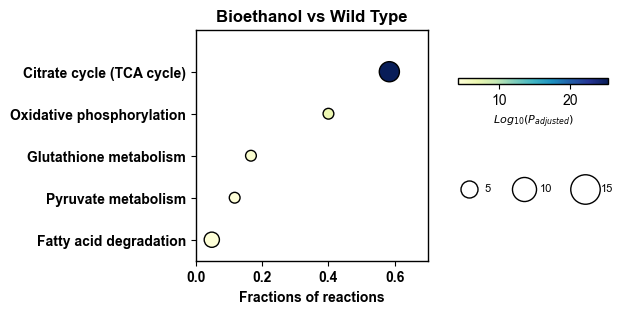

In [15]:
# plot pathway enrichment result
ax=geneset_plot(df_bioethanol_enrich,
                num=5,node_size=[5,10,15],
                cax_loc=1,
                cax_fontsize=8,
                fig_title='Different Fluxes Pathway Enrichment',
                fig_xlabel='Fractions of reactions',
                figsize=(3,3),cmap='YlGnBu',
                text_knock=2,text_maxsize=20)
ax.set_ylim(-0.5,5)
ax.set_xlim(0,0.7)

# set title
ax.set_title('Bioethanol vs Wild Type',fontdict=title_fontdict)
# save figure
# plt.savefig('figures/output/figure5_flux_pathway_enri.svg',dpi=400,bbox_inches='tight',transparent=True)
plt.show()

In [27]:
# check fluxes 
for pathway in df_bioethanol_enrich['Term']:
    print(pathway,':')
    rxnlist=df_bioethanol_enrich[df_bioethanol_enrich['Term']==pathway]['Genes'].values[0].split(';')
    for rxn in rxnlist:
        print(rxn,df_bioethanol.loc[rxn,'sig'])

Citrate cycle (TCA cycle) :
r_0451 down
r_0832 down
r_1022 down
r_0300 down
r_0301 down
r_0831 down
r_0658 down
Fatty acid degradation :
r_2272 down
r_2284 down
r_2237 down
r_2255 down
Glutathione metabolism :
r_0481 up
r_0483 up
Oxidative phosphorylation :
r_1086 up
r_0569 down
Pyruvate metabolism :
r_0113 up
r_4185 up


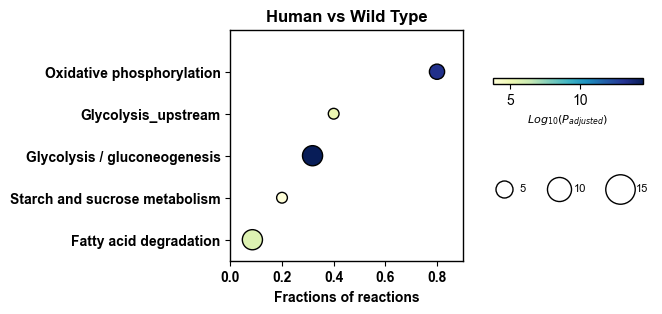

In [19]:
# plot pathway enrichment result
ax=geneset_plot(df_human_enrich,
                num=5,node_size=[5,10,15],
                cax_loc=1,
                cax_fontsize=8,
                fig_title='Different Fluxes Pathway Enrichment',
                fig_xlabel='Fractions of reactions',
                figsize=(3,3),cmap='YlGnBu',
                text_knock=2,text_maxsize=20)
ax.set_ylim(-0.5,5)
ax.set_xlim(0,0.9)

# set title
ax.set_title('Human vs Wild Type',fontdict=title_fontdict)

plt.show()

In [28]:
# check fluxes
for pathway in df_human_enrich['Term']:
    print(pathway,':')
    rxnlist=df_human_enrich[df_human_enrich['Term']==pathway]['Genes'].values[0].split(';')
    for rxn in rxnlist:
        print(rxn,df_human.loc[rxn,'sig'])

Fatty acid degradation :
r_2252 down
r_0107 down
r_0100 down
r_2269 down
r_2267 down
r_0124 down
r_2249 down
Glycolysis / gluconeogenesis :
r_0886 down
r_0990 up
r_0450 down
r_0887 up
r_0534 up
r_2116 down
r_0959 down
Glycolysis_upstream :
r_0450 down
r_0886 down
Oxidative phosphorylation :
r_1086 up
r_0226 up
r_0568 up
r_0439 up
Starch and sucrose metabolism :
r_0511 up
r_0510 up


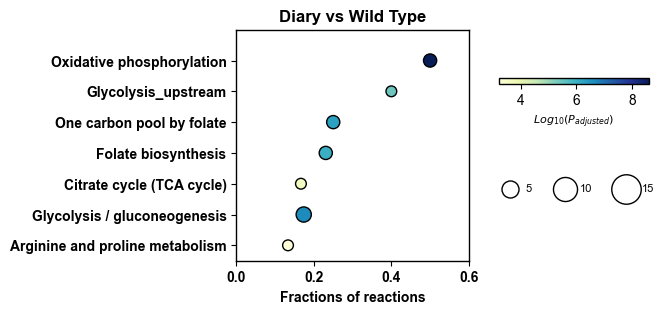

In [21]:
# diary vs wild type
ax=geneset_plot(df_diary_enrich,
                num=7,node_size=[5,10,15],
                cax_loc=1,
                cax_fontsize=8,
                fig_title='Different Fluxes Pathway Enrichment',
                fig_xlabel='Fractions of reactions',
                figsize=(3,3),cmap='YlGnBu',
                text_knock=2,text_maxsize=20)
ax.set_ylim(-0.5,7)
ax.set_xlim(0,0.6)

# set title
ax.set_title('Diary vs Wild Type',fontdict=title_fontdict)

plt.show()

In [29]:
# check fluxes
for pathway in df_diary_enrich['Term']:
    print(pathway,':')
    rxnlist=df_diary_enrich[df_diary_enrich['Term']==pathway]['Genes'].values[0].split(';')
    for rxn in rxnlist:
        print(rxn,df_diary.loc[rxn,'sig'])

Arginine and proline metabolism :
r_0473 down
r_0468 down
Citrate cycle (TCA cycle) :
r_0715 down
r_0301 down
Folate biosynthesis :
r_0188 up
r_0348 down
r_1744 down
Glycolysis / gluconeogenesis :
r_0450 down
r_0887 up
r_0959 down
r_0886 down
Glycolysis_upstream :
r_0450 down
r_0886 down
One carbon pool by folate :
r_0447 up
r_0733 up
r_0724 up
Oxidative phosphorylation :
r_1086 up
r_0569 down
r_0568 up
